In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(x_images,x_labels),(y_images,y_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
class_names=[ 'T-shirt/ top' , 'Trouser' , 'Pullover' , 'Dress ' , 'Coat ' , 'Sandal ' , 'Shirt ' , 'Sneaker' , 'Bag' , 'Ankle boot' ]

In [9]:
x_images.shape,y_images.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
len(x_labels) ,len(y_labels)

(60000, 10000)

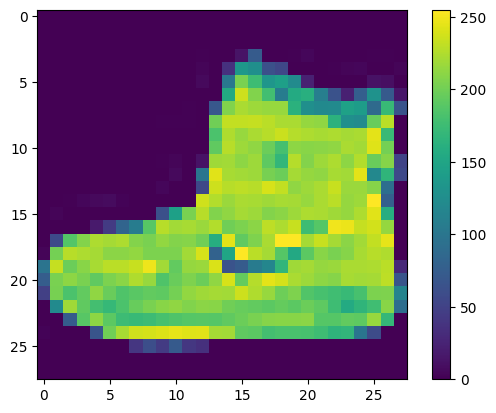

In [13]:
plt.figure()
plt.imshow(x_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
x_images = x_images/255.0
y_images = y_images / 255.0

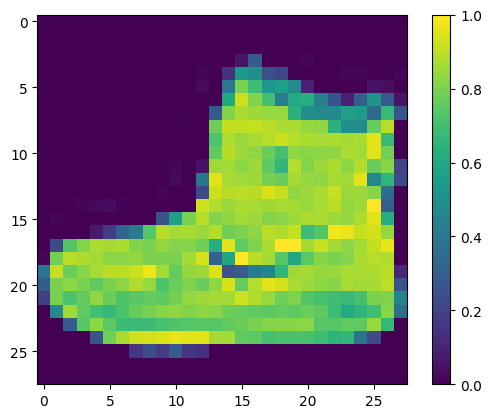

In [15]:
plt.figure()
plt.imshow(x_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

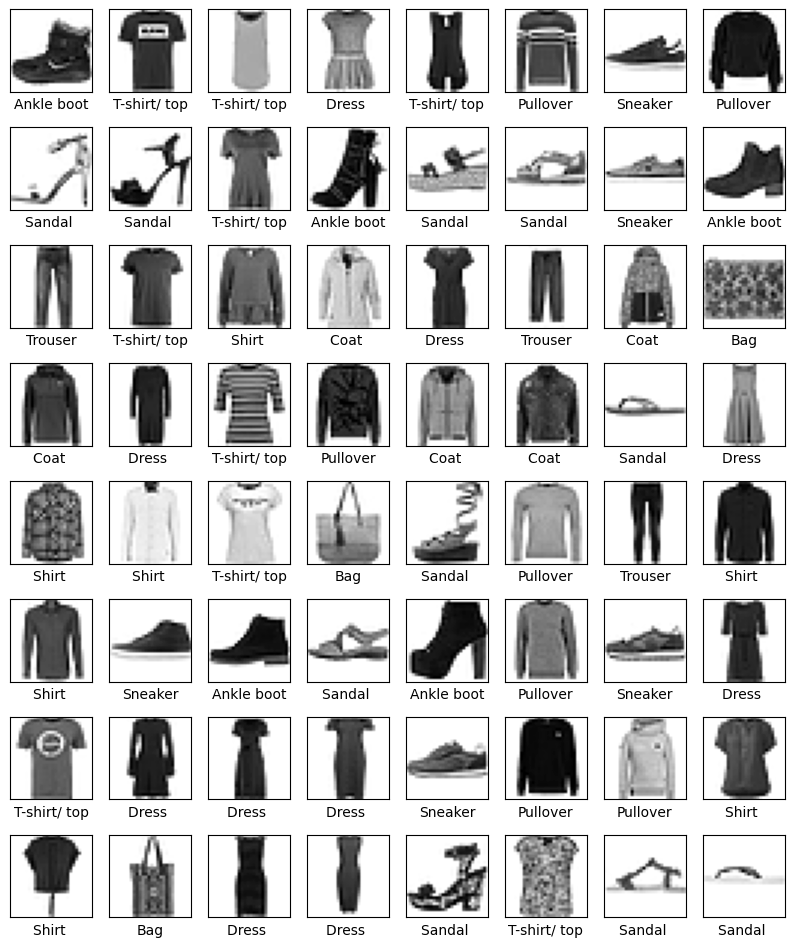

In [28]:
plt.figure(figsize=(10,12))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[x_labels[i]])
plt.show()

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_images,x_labels,epochs = 20)

Epoch 1/20


I0000 00:00:1732126050.309128     746 service.cc:145] XLA service 0x7b8908011b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732126050.309185     746 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732126050.309191     746 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 121/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5739 - loss: 1.2243

I0000 00:00:1732126051.775041     746 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7836 - loss: 0.6212
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8627 - loss: 0.3854
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8770 - loss: 0.3358
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8849 - loss: 0.3160
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8888 - loss: 0.2974
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8975 - loss: 0.2791
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9026 - loss: 0.2625
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9032 - loss: 0.2612
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9071 - loss: 0.2474
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9113 - loss: 0.2372
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9132 - loss: 0.2315
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [32]:
test_loss,test_acc = model.evaluate(y_images,y_labels,verbose = 2)
print('\ntest accuracy',test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8893 - loss: 0.3555

test accuracy 0.8892999887466431
